# Project: Wrangling and Analyze Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import requests
import tweepy

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# download the data
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# make a directory and download the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
   
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

source: https://www.geeksforgeeks.org/create-a-directory-in-python/

In [4]:
#URL downloaded programatically 
# get file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# load image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# use tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# display few lines
image_prediction.head()

jpg_url  img_num  \
tweet_id                                                                       
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                                        p1   p1_conf  p1_dog  \
tweet_id                                                       
666020888022790149  Welsh_springer_spaniel  0.465074    True   
666029285002620928                 redbone  0.506826    True   
666033412701032449         German_shepherd  0.596461    True   
666044226329800704     Rhodesian_ridgeback  0.408143    True   
666049248165822465      miniature_pinscher  0.560311    True   

                                    p2   p2_conf  p2_dog                   p3  \
tweet_id                                                                        
666020888022790149              collie  0.156665    True    Shetland_sheepdog   
666029285002620928  miniature_pinscher  0.074192    True  Rhodesian_ridgeback   
666033412701032449            malinois  0.138584    True           bloodhound   
666044226329800704             redbone  0.360687    True   miniature_pinscher   
666049248165822465          Rottweiler  0.243682    True             Doberman   

                     p3_conf  p3_dog  
tweet_id                              
666020888022790149  0.061428    True  
666029285002620928  0.072010    True  
666033412701032449  0.116197    True  
666044226329800704  0.222752    True  
666049248165822465  0.154629    True

In [5]:
os.listdir(folder_name)

['image-predictions.tsv', '.ipynb_checkpoints', 'image_predictions.tsv']

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

source: https://docs.tweepy.org/en/stable/install.html

In [6]:
import tweepy

consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
api

source: https://www.geeksforgeeks.org/read-a-file-line-by-line-in-python/

In [9]:
twitter_list = []

# read the file line by line

for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})


In [10]:
# convert the list of dictionaries into pandas

twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

source: https://sparkbyexamples.com/python/pandas-convert-list-of-dictionaries-to-dataframe/#:~:text=Use%20from_dict()%2C%20from_records(),we%20convert%20dict%20to%20DataFrame.

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
# display sample of the data
twitter_data.head(10)

tweet_id  retweet_count  favorite_count  followers_count
0  892420643555336193           8853           39467          3200889
1  892177421306343426           6514           33819          3200889
2  891815181378084864           4328           25461          3200889
3  891689557279858688           8964           42908          3200889
4  891327558926688256           9774           41048          3200889
5  891087950875897856           3261           20562          3200889
6  890971913173991426           2158           12041          3200889
7  890729181411237888          16716           56848          3200889
8  890609185150312448           4429           28226          3200889
9  890240255349198849           7711           32467          3200889

In [12]:
# display summary of dataframe
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [13]:
# display sample of the data
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1754  678798276842360832                    NaN                  NaN   
324   834086379323871233                    NaN                  NaN   
698   786363235746385920                    NaN                  NaN   
841   766864461642756096                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   

                      timestamp  \
1754  2015-12-21 04:44:55 +0000   
324   2017-02-21 17:04:24 +0000   
698   2016-10-13 00:29:39 +0000   
841   2016-08-20 05:08:29 +0000   
902   2016-07-28 01:00:57 +0000   

                                                 source  \
1754  <a href="http://twitter.com/download/iphone" r...   
324   <a href="http://twitter.com/download/iphone" r...   
698   <a href="http://twitter.com/download/iphone" r...   
841   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1754  This is Linda. She fucking hates trees. 7/10 h...                  NaN   
324   This is Lipton. He's a West Romanian Snuggle P...                  NaN   
698   This is Rizzo. He has many talents. A true ren...                  NaN   
841   RT @dog_rates: We only rate dogs... this is a ...         7.599238e+17   
902   Why does this never happen at my front door......                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1754                       NaN                        NaN   
324                        NaN                        NaN   
698                        NaN                        NaN   
841               4.196984e+09  2016-08-01 01:28:46 +0000   
902                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1754  https://twitter.com/dog_rates/status/678798276...                 7   
324   https://twitter.com/dog_rates/status/834086379...                12   
698   https://twitter.com/dog_rates/status/786363235...                13   
841   https://twitter.com/dog_rates/status/759923798...                10   
902   https://twitter.com/dog_rates/status/758467244...               165   

      rating_denominator    name  doggo floofer pupper puppo  
1754                  10   Linda   None    None   None  None  
324                   10  Lipton   None    None   None  None  
698                   10   Rizzo  doggo    None   None  None  
841                   10    None   None    None   None  None  
902                  150    None   None    None   None  None

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# check number of replies
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [16]:
# check number of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [17]:
# check if the ids are unique
twitter_archive.index.is_unique

True

In [18]:
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Bailey           7
an               7
Buddy            7
Toby             7
Daisy            7
Rusty            6
Oscar            6
Stanley          6
Dave             6
Milo             6
Jax              6
Scout            6
Koda             6
Jack             6
Bella            6
Leo              6
Alfie            5
              ... 
Bodie            1
Dutch            1
Banjo            1
Ralphy           1
Rascal           1
Snoopy           1
Mabel            1
Geoff            1
Shadoe           1
Shiloh           1
Olaf             1
Sailor           1
Herb             1
Shakespeare      1
Tyrus            1
Koko             1
Tessa            1
Ralph            1
Jeb              1
Chef             1
Jennifur         1
Jessifer    

In [19]:
# check if dogs have more than quality assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)
    
twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [20]:
# dog categories
twitter_archive['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

In [21]:
# check rating denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
# check ratings with denominator greater than 10
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

text  rating_denominator
342            @docmisterio account started on 11/15/15                  15
433   The floofs have been released I repeat the flo...                  70
784   RT @dog_rates: After so many requests, this is...                  11
902   Why does this never happen at my front door......                 150
1068  After so many requests, this is Bretagne. She ...                  11
1120  Say hello to this unbelievably well behaved sq...                 170
1165  Happy 4/20 from the squad! 13/10 for all https...                  20
1202  This is Bluebert. He just saw that both #Final...                  50
1228  Happy Saturday here's 9 puppers on a bench. 99...                  90
1254  Here's a brigade of puppers. All look very pre...                  80
1274  From left to right:\nCletus, Jerome, Alejandro...                  50
1351  Here is a whole flock of puppers.  60/50 I'll ...                  50
1433  Happy Wednesday here's a bucket of pups. 44/40...                  40
1598  Yes I do realize a rating of 4/20 would've bee...                  20
1634  Two sneaky puppers were not initially seen, mo...                 130
1635  Someone help the girl is being mugged. Several...                 110
1662  This is Darrel. He just robbed a 7/11 and is i...                  11
1663  I'm aware that I could've said 20/16, but here...                  16
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...                 120
1843  Here we have an entire platoon of puppers. Tot...                  80

In [23]:
# check the ratings numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
# check for any float ratings in the text column
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                   5                  10  
340                 75                  10  
695                 75                  10  
763                 27                  10  
1689                 5                  10  
1712                26                  10

In [25]:
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample

<bound method NDFrame.sample of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
6     890971913173991426                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
73    878404777348136964                    NaN                  NaN   
75    878281511006478336                    NaN                  NaN   
97    873337748698140672                    NaN                  NaN   
98    873213775632977920                    NaN                  NaN   
113   870726314365509632           8.707262e+17         1.648776e+07   
114   870656317836468226                    NaN                  NaN   
124   868639477480148993                    NaN                  NaN   
126   868552278524837888        

In [26]:
# check for two or moreurls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

### Quality issues
1. Drop columns that wont be used for the analysis

2. Correct numerators with decimals

3. A few of the dogs are assigned to more than one category

4. A few of the tweets collected are retweets

5. A few of the tweets are replies

6. Remove hyperlinks in the tweets

7. Error in the dog names

8. Text column contains more than URL address

### Tidiness issues
1. Drop the tweets with no images

2. Dog breeds with different case formatting and errors

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
twitterapi_clean = twitter_data.copy()

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null int64
floofer                       2356 non-null int64
pupper                        2356 non-null int64
puppo                         2356 non-null int64
number_categories             2356 n

### Issue #1:

#### Define: Drop columns that wont be used for the analysis

#### Code

In [29]:
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

#### Test

In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null int64
floofer               2356 non-null int64
pupper                2356 non-null int64
puppo                 2356 non-null int64
number_categories     2356 non-null int64
dtypes: int64(8), object(4)
memory usage: 221.0+ KB


### Issue #2:

#### Define: Correct numerators with decimals

#### Code

In [31]:
# check to see if some columns were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                   5                  10  
340                 75                  10  
695                 75                  10  
763                 27                  10  
1689                 5                  10  
1712                26                  10

In [32]:
# convert to float datatype
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)

#update values
archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### Test

In [33]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45               13.50                10.0  
340              75.00                10.0  
695               9.75                10.0  
763              11.27                10.0  
1689              9.50                10.0  
1712             11.26                10.0

### Issue #3:

#### Define: A few of the dogs are assigned to more than one category

In [34]:
# check the name of the dog
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Bailey           7
an               7
Buddy            7
Toby             7
Daisy            7
Rusty            6
Oscar            6
Stanley          6
Dave             6
Milo             6
Jax              6
Scout            6
Koda             6
Jack             6
Bella            6
Leo              6
Alfie            5
              ... 
Bodie            1
Dutch            1
Banjo            1
Ralphy           1
Rascal           1
Snoopy           1
Mabel            1
Geoff            1
Shadoe           1
Shiloh           1
Olaf             1
Sailor           1
Herb             1
Shakespeare      1
Tyrus            1
Koko             1
Tessa            1
Ralph            1
Jeb              1
Chef             1
Jennifur         1
Jessifer    

In [35]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)
    
twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [36]:
# dog categories
twitter_archive['number_categories'].value_counts()

4    2356
Name: number_categories, dtype: int64

### Issue #4 & 5:

#### Define: A few of the tweets collected are retweets and replies

In [37]:
# check number of replies
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [38]:
# check number of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [39]:
# drop the retweets
twitter_archive = twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

In [40]:
# make sure there is no retweets
print(sum(twitter_archive.retweeted_status_user_id.value_counts()))

0


In [41]:
# show all the columns
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [42]:
# display clean data
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
959   751251247299190784                    NaN                  NaN   
1222  714258258790387713                    NaN                  NaN   
243   846139713627017216                    NaN                  NaN   
264   842163532590374912                    NaN                  NaN   
2223  668297328638447616                    NaN                  NaN   

                      timestamp  \
959   2016-07-08 03:07:09 +0000   
1222  2016-03-28 01:10:13 +0000   
243   2017-03-26 23:20:02 +0000   
264   2017-03-16 00:00:07 +0000   
2223  2015-11-22 05:17:54 +0000   

                                                 source  \
959   <a href="http://twitter.com/download/iphone" r...   
1222  <a href="http://twitter.com/download/iphone" r...   
243   <a href="http://twitter.com/download/iphone" r...   
264   <a href="http://twitter.com/download/iphone" r...   
2223  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
959   This is Gilbert. He's being chased by a battal...                  NaN   
1222  Meet Travis and Flurp. Travis is pretty chill ...                  NaN   
243   SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...                  NaN   
264   Meet George. He looks slightly deflated but ov...                  NaN   
2223  2 rare dogs. They waddle (v inefficient). Some...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
959                        NaN                        NaN   
1222                       NaN                        NaN   
243                        NaN                        NaN   
264                        NaN                        NaN   
2223                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
959   https://twitter.com/dog_rates/status/751251247...                10   
1222  https://twitter.com/dog_rates/status/714258258...                10   
243   https://twitter.com/csncapitals/status/8460884...                13   
264   https://twitter.com/dog_rates/status/842163532...                12   
2223  https://twitter.com/dog_rates/status/668297328...                 9   

      rating_denominator     name  doggo  floofer  pupper  puppo  \
959                   10  Gilbert      1        1       1      1   
1222                  10   Travis      1        1       1      1   
243                   10     None      1        1       1      1   
264                   10   George      1        1       1      1   
2223                  10     None      1        1       1      1   

      number_categories  
959                   4  
1222                  4  
243                   4  
264                   4  
2223                  4

### Issue #6:

#### Define:  Remove hyperlinks in the tweets

In [43]:
 #define function and apply to archive_clean table
def htmlink(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
archive_clean.text = archive_clean.text.apply(htmlink)

In [44]:
# make sure there is no hyperlink in the columns
for row in archive_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

### Cleaning #1:

#### Define: Drop the tweets with no images

In [45]:
# drop the rows with no images
archive_clean.dropna(axis = 0, inplace=True)

In [46]:
#test if it works
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null int64
floofer               2356 non-null int64
pupper                2356 non-null int64
puppo                 2356 non-null int64
number_categories     2356 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 239.3+ KB


### Cleaning#2:

#### Define: Dog breeds with different case formatting and errors

In [47]:
# display current labels
image_prediction.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [48]:
# change labels
image_prediction.columns = ['image_url',
                           'img_number', 
                            '1st_prediction',
                            '1st_prediction_confidence',
                            '1st_prediction_isdog',
                            '2nd_prediction',
                            '2nd_prediction_confidence',
                            '2nd_prediction_isdog',
                            '3rd_prediction',
                            '3rd_prediction_confidence',
                            '3rd_prediction_isdog']

In [49]:
#display the new named labels
image_prediction.columns

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')

In [50]:
# columns with dog breed
dog_breed_cols = ['1st_prediction', '2nd_prediction', '3rd_prediction']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction[column] = image_prediction[column].str.replace('_', ' ').str.title()

In [51]:
# display sample of changes
image_prediction[dog_breed_cols].sample(5)

1st_prediction      2nd_prediction  \
tweet_id                                                   
677334615166730240  Lakeland Terrier            Airedale   
770093767776997377  Golden Retriever  Labrador Retriever   
689143371370250240  English Springer            Papillon   
693942351086120961       Groenendael  Norwegian Elkhound   
684177701129875456              Chow     German Shepherd   

                            3rd_prediction  
tweet_id                                    
677334615166730240     Irish Water Spaniel  
770093767776997377                  Kelpie  
689143371370250240  Welsh Springer Spaniel  
693942351086120961              Schipperke  
684177701129875456        Golden Retriever

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [53]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [54]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null int64
floofer               2356 non-null int64
pupper                2356 non-null int64
puppo                 2356 non-null int64
number_categories     2356 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 221.0+ KB


In [55]:
# convert dataframe types
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

In [56]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null category
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null int64
floofer               2356 non-null int64
pupper                2356 non-null int64
puppo                 2356 non-null int64
number_categories     2356 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 205.0+ KB


### Insights:
1. Most used twitter source

2. Most common dog breed

3. Show the possitive correlation between retweets and likes

#### Q1: Most used twitter source

In [71]:
df = pd.read_csv('twitter_archive_master.csv')

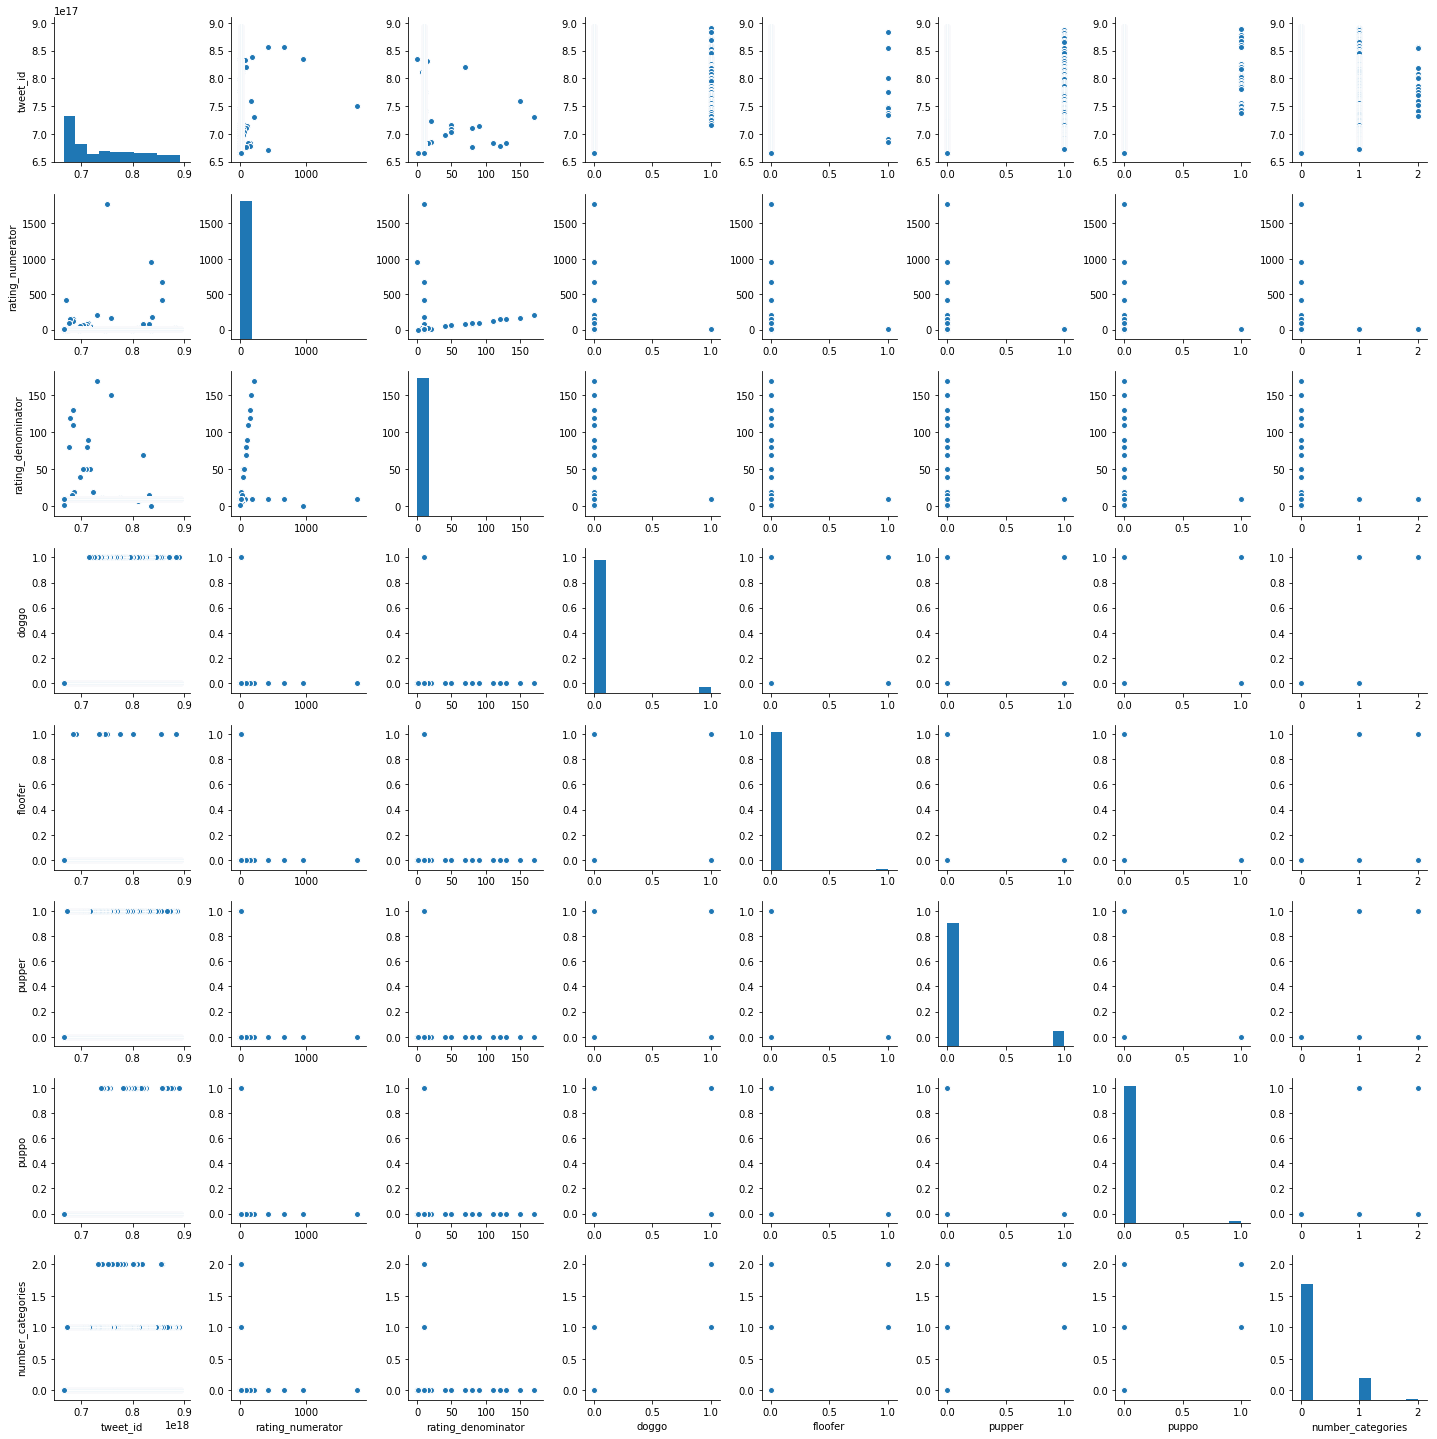

In [76]:
# expected possitive correlation between retweets and likes
sns.pairplot(df);

Displays the positive correlation between the retweets and likes

In [77]:
source = twitter_archive_master['source'].value_counts()
source

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

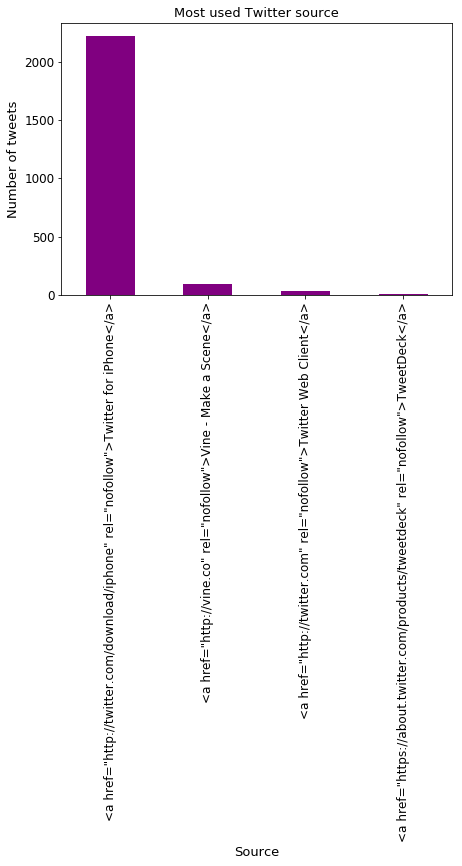

In [83]:
# plot
g_bar = source.plot.bar(color = 'purple', fontsize = 12)

# figure size(width, height)
g_bar.figure.set_size_inches(7, 5);

# add the labels
plt.title('Most used Twitter source', color = 'black', fontsize = '13')
plt.xlabel('Source', color = 'black', fontsize = '13')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

Twitter for iPhone is the most popular

#### Q:2 Most popular dog name

In [79]:
pname = twitter_archive_master.name.value_counts()[1:10]

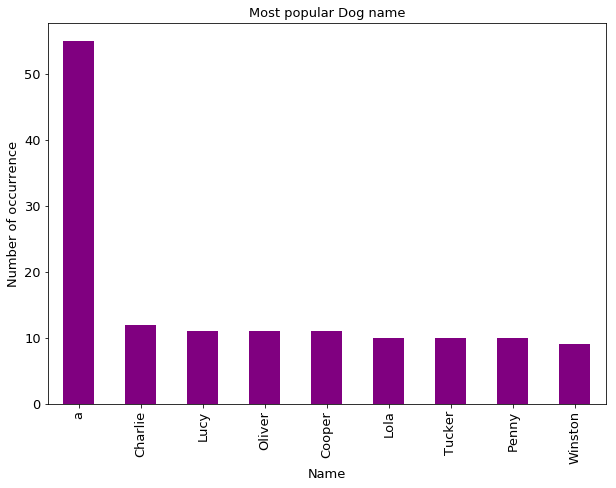

In [80]:
#plot
g_bar = pname.plot.bar(color = 'purple', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most popular Dog name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

Charlie is the msot popular name with (12)